In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")




In [10]:
# reflect an existing database into a new model 
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)



In [11]:
# View all of the classes that automap found
Base.classes.keys()




['measurement', 'station']

In [12]:
# Save references to each table - unable to link file if it is inside a folder
Measurement = Base.classes.measurement
Station = Base.classes.station



In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)




# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session = Session(engine)
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date



('2017-08-23',)

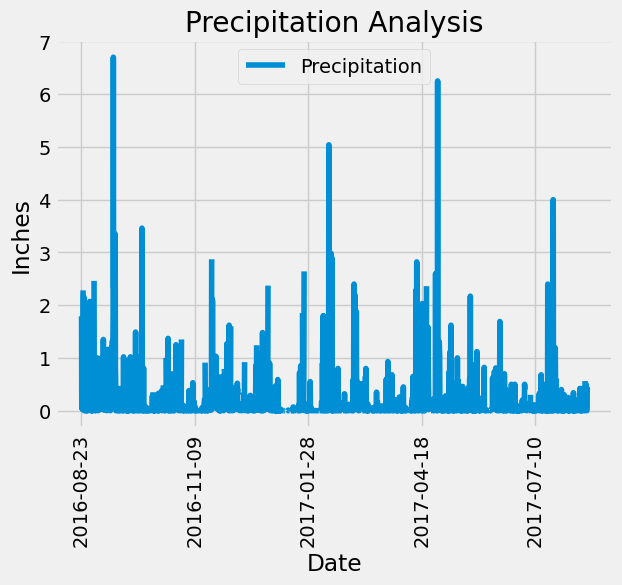

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017,8, 23)   


# Calculate the date one year from the last date in data set.
year_ago = latest_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()



# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])   


# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.show()



In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()



,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(Station.station)).all()
stations



[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.   
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
for station in active_stations:
    print(station)
    


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()




[(54.0, 85.0, 71.66378066378067)]

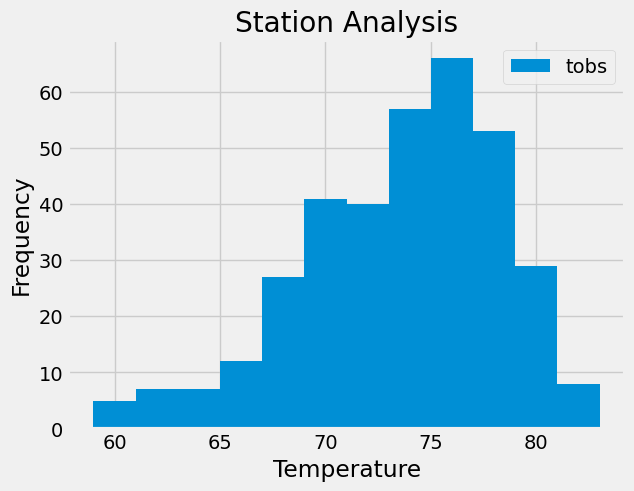

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_stations_temp = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= year_ago).all()
active_stations_temp_df = pd.DataFrame(active_stations_temp, columns=['tobs'])
active_stations_temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis")
plt.legend(["tobs"])
plt.show()




# Close Session

In [21]:
# Close Session
session.close()